In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
data_path = 'data/'

In [3]:
int_cols = ['PRICE_ZONE_ID', 'POWER_SYS_ID']

In [4]:
df = dict()
for file in os.listdir(data_path):
    if file.endswith('.csv') and file[0] != '.':
        print(file)
        idx = "_".join(file.split('.')[1:3])
        df[idx] = pd.read_csv(data_path + file, sep=';', index_col=0, decimal=',')
        for col in int_cols:
            df[idx][col] = pd.to_numeric(df[idx][col].fillna(-1), downcast='integer')
        df[idx].index = pd.to_datetime(df[idx].index, format="%d.%m.%Y %H:%M:%S")

Ценовые показатели_02.01.2020.csv
Ценовые показатели_05.04.2020.csv
Ценовые показатели_01.12.2019.csv
Ценовые показатели_04.03.2020.csv
Ценовые показатели_03.02.2020.csv


In [5]:
df['02_2020'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2020-01-03 to 2020-02-03
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SUM_AVERAGE_PRICE         224 non-null    float64
 1   SUM_MAX_PRICE             224 non-null    float64
 2   SUM_AVERAGE_ACCEPT_PRICE  224 non-null    float64
 3   SUM_RSV_PRICE             224 non-null    float64
 4   PRICE_ZONE_ID             224 non-null    int8   
 5   POWER_SYS_ID              224 non-null    int32  
dtypes: float64(4), int32(1), int8(1)
memory usage: 9.8 KB


In [6]:
df_zone = defaultdict()
df_power_sys = defaultdict()

In [7]:
for month_df in df.values():
#     print(month_df)
    for zone in month_df['PRICE_ZONE_ID'].unique():
        if zone != -1:
            if df_zone.get(zone) is not None:
                df_zone[zone] = pd.concat([df_zone[zone], month_df.query('PRICE_ZONE_ID == @zone')])
            else:
                df_zone[zone] = month_df.query('PRICE_ZONE_ID == @zone')
    for sys in month_df['POWER_SYS_ID'].unique():
        if sys != -1:
            if df_power_sys.get(sys) is not None:
                df_power_sys[sys] = pd.concat([df_power_sys[sys], month_df.query('POWER_SYS_ID == @sys')])
            else:
                df_power_sys[sys] = month_df.query('POWER_SYS_ID == @sys')

In [8]:
# 53 - ОЭС Центра
# 55 - ОЭС Юга
# 60 - ОЭС Средней Волги
# 61 - ОЭС Сибири
# 63 - ОЭС Урала
df_power_sys.keys()

dict_keys([530000, 550000, 600000, 610000, 630000])

In [9]:
zone_test_df = df_zone[1].sort_index()
hub_test_df = df_power_sys[630000].sort_index()

In [10]:
hub_test_df

,SUM_AVERAGE_PRICE,SUM_MAX_PRICE,SUM_AVERAGE_ACCEPT_PRICE,SUM_RSV_PRICE,PRICE_ZONE_ID,POWER_SYS_ID
M_DATE,,,,,,
2019-11-01,1006.588173,1467.199170,943.825152,1022.172371,-1,630000
2019-11-02,998.471517,1538.042076,946.900884,1042.208829,-1,630000
2019-11-03,909.617523,1454.992633,855.191386,973.677902,-1,630000
2019-11-04,1005.513568,1491.950928,911.457031,1037.455627,-1,630000
2019-11-05,1127.971423,1574.449371,1067.281268,1072.115799,-1,630000
...,...,...,...,...,...,...
2020-04-01,766.914411,923.787514,782.521225,994.875234,-1,630000
2020-04-02,767.706584,953.866943,757.570023,905.549507,-1,630000
2020-04-03,905.534826,1124.963704,866.000450,1003.737254,-1,630000


In [13]:
date_idx = zone_test_df.index

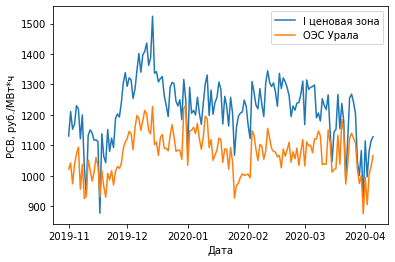

In [14]:
plt.plot(date_idx, zone_test_df['SUM_RSV_PRICE'])
plt.plot(date_idx, hub_test_df['SUM_RSV_PRICE'])
plt.legend(['I ценовая зона', 'ОЭС Урала'])
plt.xlabel('Дата')
plt.ylabel('РСВ, руб./МВт*ч')
plt.show()

## Hub statistics

In [42]:
hubs_stat = pd.read_excel('hub_statistics/hub_statistics_20190710.xls')

In [43]:
hubs_stat.groupby('node_name')['cost'].mean()

node_name
Барабинская ТЭЦ СШ 110 кВ        1041.734074
Барабинская ТЭЦ СШ 110 кВ_шгн    1041.734074
Барабинская ТЭЦ СШ 220 кВ        1043.501704
Барабинская-220                  1042.854791
Барабинская-500                  1024.463785
                                    ...     
Чулымская-110                    1026.044908
Чулымская-220                    1022.638359
Электродная                      1003.676063
Южная-110                        1003.443697
Южная-220                        1003.954516
Name: cost, Length: 70, dtype: float64

In [44]:
rsv_hubs_stat = pd.pivot_table(hubs_stat, index='node_name', columns='hour', values='cost')

In [45]:
rsv_hubs_stat.index

Index(['Барабинская ТЭЦ СШ 110 кВ', 'Барабинская ТЭЦ СШ 110 кВ_шгн',
       'Барабинская ТЭЦ СШ 220 кВ', 'Барабинская-220', 'Барабинская-500',
       'Барышево', 'Васхнил-1', 'Васхнил-2', 'Восточная-110 (3,4СШ)',
       'Восточная-110 (ТГ-5,6)', 'Восточная-220 (ТГ1,2)', 'Груздевка-110',
       'Дружная-110', 'Дружная-220', 'Заря-220', 'Заря-500', 'Заря-АТ1',
       'Заря-АТ2', 'Зубково', 'Инская', 'Искитим', 'Кировская-110',
       'Кокошино-110', 'Колывань', 'Кочки', 'Краснозерская', 'Мостовая-110',
       'Моховая', 'Мурлыткино', 'НГЭС-110', 'НГЭС-110 (ГГ-1-7)', 'НГЭС-220',
       'НТЭЦ-3-110', 'НТЭЦ-3-110 (ТГ-1,5,7-12)', 'НТЭЦ-3-220', 'НТЭЦ-4',
       'НТЭЦ-5 (3Г)_шгн', 'НТЭЦ-5 (4Г)_шгн', 'Научная-110', 'Научная-220',
       'Новосибирская ТЭЦ-2', 'Новосибирская ТЭЦ-2 ТГ-3-5',
       'Новосибирская ТЭЦ-2 ТГ-6-9', 'Ордынская', 'Отп. Электрод',
       'Отрадная-110', 'Отрадная-220', 'Ояш', 'ПП Библиотечный_1СШ',
       'ПП Библиотечный_2СШ', 'Правобереж-110', 'Правобереж-220', 'Районн

In [40]:
rsv_hubs_stat

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
node_name,,,,,,,,,,,,,,,,,,,,,
Барабинская ТЭЦ СШ 110 кВ,852.92650,824.74225,817.56360,815.21606,832.38210,846.66220,928.30963,934.26276,1011.84094,1049.03370,...,1155.09660,1166.1451,1154.52270,1119.13540,1164.8821,1017.00710,1039.81980,1063.50290,964.97970,863.62330
Барабинская ТЭЦ СШ 110 кВ_шгн,852.92650,824.74225,817.56360,815.21606,832.38210,846.66254,928.31030,934.26355,1011.84174,1049.03440,...,1155.09720,1166.1456,1154.52320,1119.13600,1164.8827,1017.00760,1039.82030,1063.50340,964.98020,863.62384
Барабинская ТЭЦ СШ 220 кВ,851.26220,823.67350,816.73303,814.57640,831.64996,846.46450,928.27860,934.82760,1010.66670,1047.85020,...,1151.77380,1162.7930,1151.00320,1115.74120,1161.3796,1014.35740,1036.38680,1059.92040,962.53894,862.50990
Барабинская-220,850.67020,822.73145,815.45240,812.95435,829.86456,844.73910,927.12560,933.82380,1010.29755,1047.48160,...,1152.15160,1163.1548,1151.42200,1116.13330,1161.8516,1014.69586,1037.52840,1061.20480,963.15155,862.33466
Барабинская-500,849.10223,821.46870,814.07745,811.38184,828.00397,843.11900,926.64810,934.61940,1009.31116,1046.61500,...,1150.00670,1161.1017,1149.14120,1113.57740,1159.3235,1012.06940,1034.95280,1058.50650,961.12210,861.18024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чулымская-110,835.46160,819.27940,819.67053,823.83060,840.41113,855.38460,922.10730,928.11540,978.46075,1014.01215,...,1086.91020,1098.6948,1085.14660,1051.58080,1095.1877,964.49713,967.30695,988.75165,916.45400,843.62103
Чулымская-220,834.04080,818.08060,818.68000,823.00330,839.68524,854.75854,921.22880,927.24740,977.00320,1012.63794,...,1084.68310,1096.4644,1082.83410,1049.29490,1092.9619,962.51540,964.73710,986.21410,914.28100,842.05150
Электродная,820.21313,814.22840,819.06550,826.22296,838.76550,851.39850,901.68085,907.36880,932.89420,964.66925,...,1016.32477,1028.9040,1012.77374,979.42255,1024.5588,911.09186,901.66050,921.23096,873.35650,826.23110


In [11]:
rsv_hubs_stat.to_excel('hubs_pivot.xls')

## Comparing hubs with subsystem

In [34]:
zone = pd.read_csv('RSV_statistics_hour_13052020_13052020.csv',
                   sep=';',
                   decimal='.',
                   encoding='cp1251'
                  )

In [35]:
zone.describe()

,Час,"Объем планового производства, МВт.ч","Индекс равновесных цен на продажу электроэнергии, руб./МВт.ч.","Объем продажи по регулируемым договорам, МВт.ч","Объем продажи на РСВ, МВт.ч","Объем покупки в обеспечение РД, МВт.ч","Максимальный индекс равновесной цены, руб./МВт.ч","Минимальный индекс равновесной цены, руб./МВт.ч",Unnamed: 8
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,0.0
mean,11.500000,20994.088042,848.182500,3217.096875,17484.875542,516.692708,4.653600e+03,766.643333,NaN
std,7.071068,836.628041,23.646964,1526.767601,840.251566,287.780616,9.290560e-13,11.998605,NaN
min,0.000000,19350.285000,809.130000,1409.052000,15875.490000,159.441000,4.653600e+03,734.210000,NaN
25%,5.750000,20453.745750,822.232500,1457.897250,17273.327000,294.291250,4.653600e+03,759.082500,NaN
50%,11.500000,21368.889500,855.300000,3244.937000,17816.792000,423.815000,4.653600e+03,773.855000,NaN
75%,17.250000,21629.151000,868.357500,3398.557000,17999.352750,790.828750,4.653600e+03,775.447500,NaN
max,23.000000,21849.734000,872.140000,5983.455000,18584.002000,961.788000,4.653600e+03,778.650000,NaN


In [14]:
idx = zone['INTERVAL']
list_of_hubs = ['Барабинская ТЭЦ СШ 110 кВ',
                'Восточная-110 (ТГ-5,6)',
                'НТЭЦ-3-110',
                'НГЭС-110',
#                 'ПП Библиотечный_1СШ'
               ]

Барабинская ТЭЦ СШ 110 кВ
Восточная-110 (ТГ-5,6)
НТЭЦ-3-110
НГЭС-110


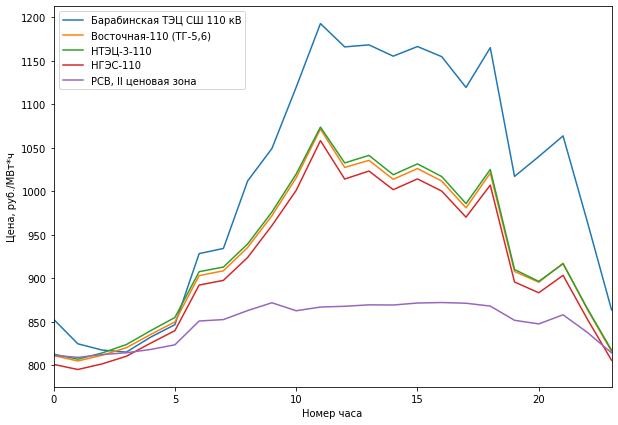

In [37]:
plt.figure(figsize=(10,7))
for hub in list_of_hubs:
    print(hub)
    plt.plot(idx, rsv_hubs_stat.loc[hub])
plt.plot(idx, zone['Индекс равновесных цен на продажу электроэнергии, руб./МВт.ч.'])
plt.legend([*list_of_hubs, 'РСВ, II ценовая зона'])
plt.xlabel('Номер часа')
plt.ylabel('Цена, руб./МВт*ч')
plt.xlim(0,23)
plt.show()

In [38]:
zone_rsv_price = zone['Индекс равновесных цен на продажу электроэнергии, руб./МВт.ч.']

Барабинская ТЭЦ СШ 110 кВ 18.895302038928968
Восточная-110 (ТГ-5,6) 9.205798803874234
НТЭЦ-3-110 9.582648041082505
НГЭС-110 8.282147423321343


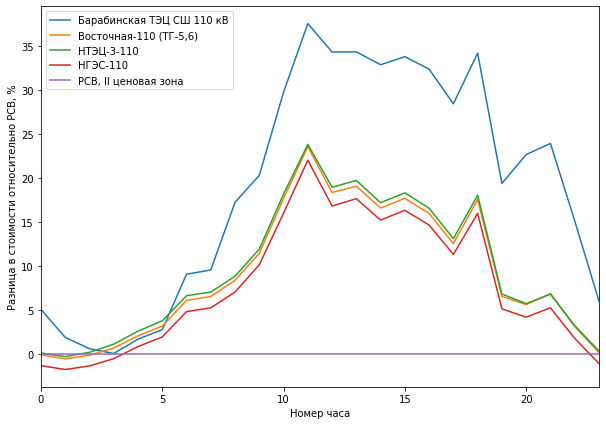

In [39]:
plt.figure(figsize=(10,7))
for hub in list_of_hubs:
    print(hub, ((rsv_hubs_stat.loc[hub] - zone_rsv_price)\
             / zone_rsv_price * 100).abs().mean())
    plt.plot(idx, (rsv_hubs_stat.loc[hub] - zone_rsv_price)\
             / zone_rsv_price * 100)
plt.plot(idx, zone_rsv_price - zone_rsv_price)
plt.legend([*list_of_hubs, 'РСВ, II ценовая зона'])
plt.xlabel('Номер часа')
plt.ylabel('Разница в стоимости относительно РСВ, %')
plt.xlim(0,23)
plt.show()

In [17]:
(rsv_hubs_stat.loc['НТЭЦ-3-110'] - rsv_hubs_stat.loc['НГЭС-110']).mean()

15.021701666666678

## Isolated systems

In [18]:
colums = ['hour',
          'area',
          'hub_id',
          'balance_hub_id'
         ]

In [19]:
isolated_systems = pd.read_csv('isolated_data/20200513_sib_isolated_areas.csv',
                               sep=';',
#                                index_col=0,
                               decimal=',',
                               encoding='cyrillic',
                               skiprows=1,
                               header=None
                              )
isolated_systems.columns= colums

In [20]:
tmp = isolated_systems.groupby('hub_id').hour.count().index.values
isolated_systems.groupby('hub_id').hour.count()

hub_id
1000713    24
1000714    24
1000719    24
1000874    24
1000895    24
1001199    24
1003080    24
1003176    24
1005002    24
1005005    24
Name: hour, dtype: int64

In [21]:
isolated_systems.query('hour == 12')

,hour,area,hub_id,balance_hub_id
60,12,1009,1000713,1003080
61,12,1009,1000714,1003080
62,12,1009,1000719,1003080
63,12,1064,1003080,1003080
64,12,1097,1003176,1003080
144,12,1098,1001199,1005002
145,12,1099,1005002,1005002
204,12,1061,1005005,1005005
205,12,1062,1000874,1005005
206,12,1063,1000895,1005005


In [22]:
isolated_systems = pd.read_csv('isolated_data/20200501_sib_isolated_areas.csv',
                               sep=';',
#                                index_col=0,
                               decimal=',',
                               encoding='cyrillic',
                               skiprows=1,
                               header=None
                              )
isolated_systems.columns= colums

In [23]:
np.setdiff1d(tmp, isolated_systems.groupby('hub_id').hour.count().index.values)

array([1000713, 1000714])